In [17]:
import pandas as pd
from scipy.stats import ttest_ind as ttest
import numpy as np

In [31]:
from glob import glob
fns = glob("../results/eval_preds/preds_*.csv")

In [32]:
dfs = []
for fn in fns:
    df = pd.read_csv(fn)
    pos_inds = df.loc[df.label==1,:].index
    neg_inds = df.loc[df.label==0,:].index
    pos_preds = df.prediction[pos_inds]
    neg_preds = df.prediction[neg_inds]
    
    pn_diff = np.mean(pos_preds) - np.mean(neg_preds)
    pval = ttest(pos_preds, neg_preds).pvalue / 2
    
    df = pd.DataFrame({"pn_diff":[pn_diff], "neg_log10_pvalue": [-np.log10(pval)]})
    dfs.append(df)
diff_df = pd.concat(dfs)

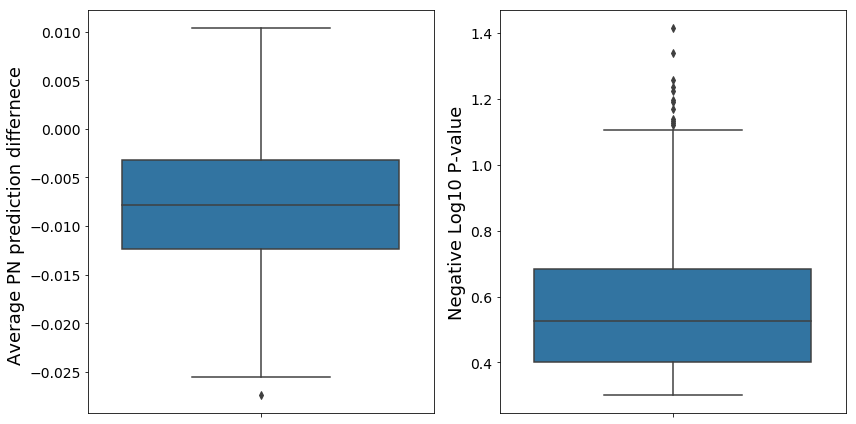

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
f, [ax1, ax2] = plt.subplots(nrows=1,ncols=2, figsize=(12,6))

sns.boxplot(data=diff_df, y="pn_diff", ax=ax1)
sns.boxplot(data=diff_df, y="neg_log10_pvalue", ax=ax2)

# ax1.set_ylim(0,1.01)

ax1.set_ylabel("Average PN prediction differnece ", fontsize=18)
ax2.set_ylabel("Negative Log10 P-value", fontsize=18)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)


f.tight_layout()

plt.savefig("../results/evaluation_prediction_confidential.png")

plt.show()
plt.close()

In [40]:
df = pd.read_csv("../eval_features/processed/condition.csv",index_col=0)

In [41]:
print(df.shape[0] - df.death.sum())
print(df.death.sum())

20936
96
